<a href="https://colab.research.google.com/github/chssong/bike-sharing-demand/blob/main/bike_sharing_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/AI교육/실습 데이터/bike sharing demand/train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
test_data = pd.read_csv('/content/drive/MyDrive/AI교육/실습 데이터/bike sharing demand/test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 데이터 확인

1. **datetime** - hourly date + timestamp  
2. **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
3. **holiday** - whether the day is considered a holiday (0: 일반일, 1: 행사일)
4. **workingday** - whether the day is neither a weekend nor holiday (1:출근하는 날,0: 출근 안하는 날(토,일)
5. **weather** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy, 
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
6. **temp** - temperature in Celsius
7. **atemp** - "feels like" temperature in Celsius
8. **humidity** - relative humidity
9. **windspeed** - wind speed
10. **casual** - number of non-registered user rentals initiated
11. **registered** - number of registered user rentals initiated
12. **count** - number of total rentals

In [5]:
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### datetime 전처리

In [7]:
train_data['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [8]:
# type: object-> datetime
train_data['datetime'] = pd.to_datetime(train_data['datetime'])

test_data['datetime'] = pd.to_datetime(test_data['datetime'])

In [9]:
# pandas의 datetime 열에서 연, 월, 일, 시간 추출
train_data['year'] = train_data['datetime'].dt.year
train_data['month'] = train_data['datetime'].dt.month
train_data['day'] = train_data['datetime'].dt.day
train_data['hour'] = train_data['datetime'].dt.hour

In [10]:
test_data['year'] = test_data['datetime'].dt.year
test_data['month'] = test_data['datetime'].dt.month
test_data['day'] = test_data['datetime'].dt.day
test_data['hour'] = test_data['datetime'].dt.hour

In [11]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


## weather 확인
자전거 수요와 상관관계가 높을 것이라 예상

In [12]:
train_data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'weather')

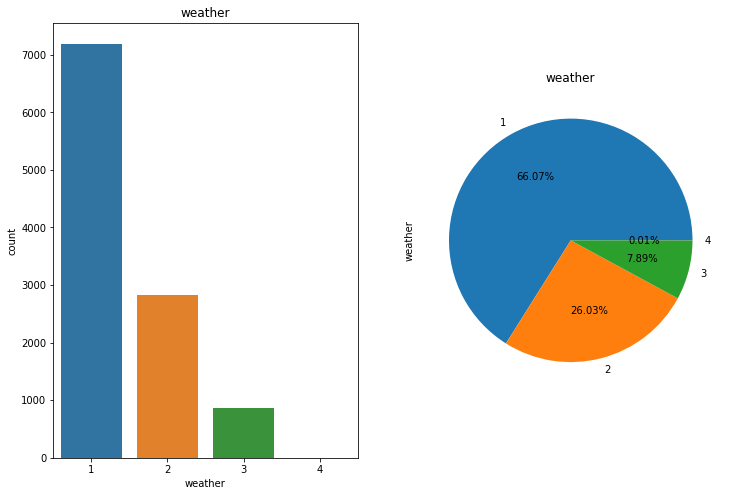

In [13]:
f,ax=plt.subplots(1,2,figsize=(12,8))

sns.countplot('weather', data=train_data, ax=ax[0])
train_data['weather'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[1])
ax[0].set_title('weather')
ax[1].set_title('weather')

## windspeed
-> 아웃라이어 대체하기

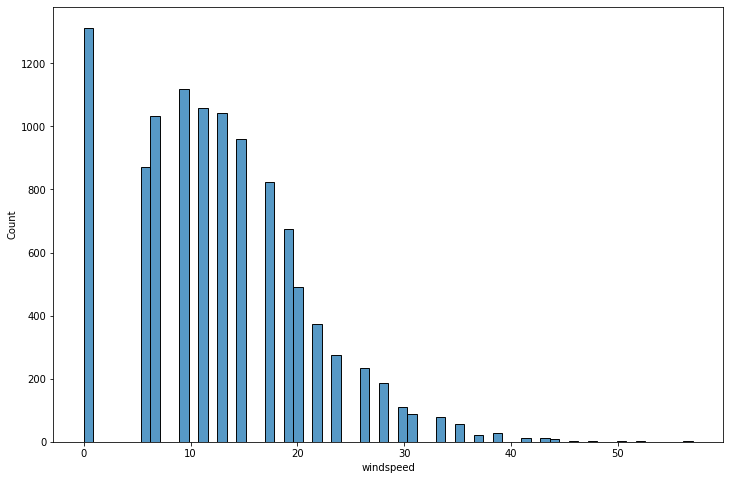

In [14]:
plt.figure(figsize=(12, 8))
sns.histplot(train_data['windspeed'])

In [15]:
train_data['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [16]:
# 평균치 확인
train_data['windspeed'].mean()

12.799395406945093

In [17]:
# 아웃라이어(0) Nan값으로 바꾸기
cond = (train_data['windspeed'] == 0)
train_data.loc[cond, 'windspeed'] = np.nan

In [18]:
# 1. 결측치를 뒤의 값으로 채우기
train_data['windspeed'] = train_data['windspeed'].interpolate().bfill()

# 평균 확인
train_data['windspeed'].mean()

13.827650918611562

In [19]:
# 2. 결측치를 뒤의 값으로 채우기
# train_data['windspeed'] = train_data['windspeed'].interpolate().ffill()

# 평균 확인
# train_data['windspeed'].mean()

In [20]:
# 3. 결측치를 평균값으로 채우기
# train_data['windspeed'].fillna(train_data['windspeed'].mean())

# 평균 확인
# train_data['windspeed'].mean()

In [21]:
# 대체 여부 확인하기
train_data['windspeed'].value_counts()

8.998100     1156
7.001500     1146
11.001400    1071
12.998000    1047
6.003200     1040
             ... 
10.637773       1
6.275464        1
6.547727        1
6.819991        1
7.751900        1
Name: windspeed, Length: 294, dtype: int64

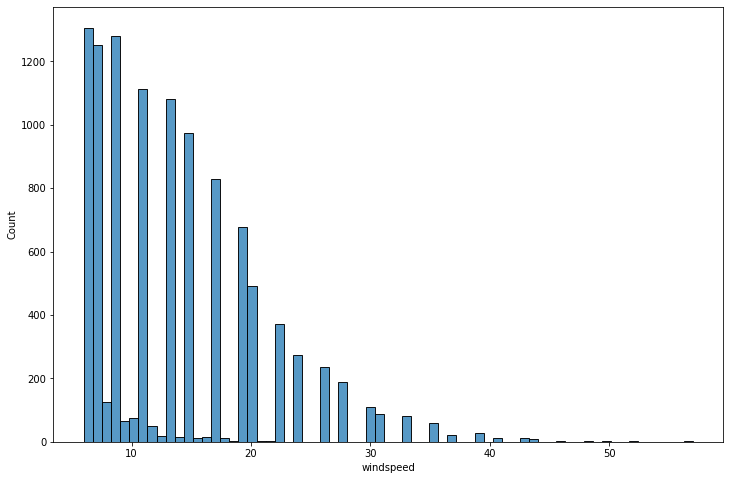

In [22]:
plt.figure(figsize=(12, 8))
sns.histplot(train_data['windspeed'])

## 상관관계 확인

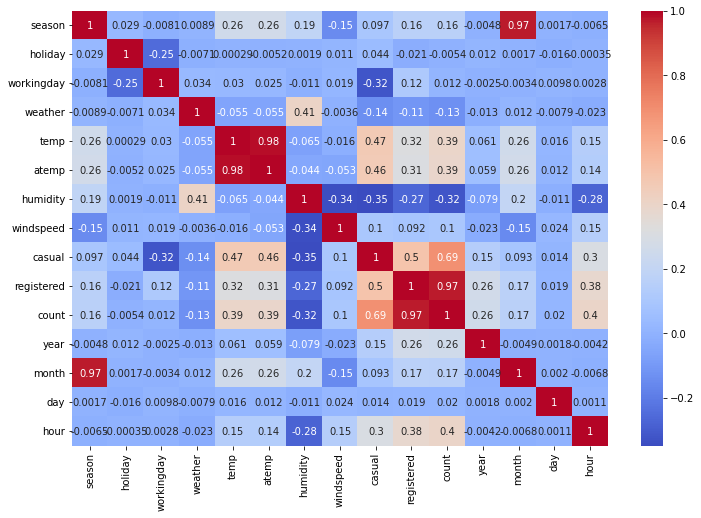

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [24]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.0032,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.0032,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.0032,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.0032,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.0032,0,1,1,2011,1,1,4


In [25]:
features = [
    'season', 
    #'holiday', 
    #'workingday', 
    'weather', 
    'temp',
    'atemp', 
    'humidity', 
    'windspeed', 
    'year', 
    'month', 
    #'day',
    'hour'
]

train/test set 분할

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_features= train_data[features]
y_target = train_data['count']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.25)

In [29]:
x_train.shape, x_test.shape

((8164, 9), (2722, 9))

In [30]:
x_train.head()

,season,weather,temp,atemp,humidity,windspeed,year,month,hour
2677,2,2,29.52,33.335,58,6.00320,2011,6,11
6427,1,1,9.84,12.120,48,8.99810,2012,3,1
3510,3,1,26.24,30.305,69,19.99950,2011,8,4
9647,4,1,22.96,26.515,83,12.99800,2012,10,8
2246,2,1,35.26,41.665,53,13.99965,2011,6,12


In [31]:
x_train.reset_index(inplace=True, drop=True)
x_train.head()

,season,weather,temp,atemp,humidity,windspeed,year,month,hour
0,2,2,29.52,33.335,58,6.00320,2011,6,11
1,1,1,9.84,12.120,48,8.99810,2012,3,1
2,3,1,26.24,30.305,69,19.99950,2011,8,4
3,4,1,22.96,26.515,83,12.99800,2012,10,8
4,2,1,35.26,41.665,53,13.99965,2011,6,12


In [32]:
x_test.reset_index(inplace=True, drop=True)
x_test.head()

,season,weather,temp,atemp,humidity,windspeed,year,month,hour
0,4,1,21.32,25.000,59,11.001400,2012,10,18
1,2,1,17.22,21.210,35,12.998000,2012,4,22
2,1,2,18.86,22.725,77,6.003200,2012,3,13
3,1,1,8.20,11.365,82,7.001500,2012,1,8
4,4,1,18.86,22.725,88,9.910518,2011,10,7


In [33]:
y_train.reset_index(inplace=True, drop=True)
y_train.head()

0    377
1      6
2      5
3    206
4    169
Name: count, dtype: int64

In [34]:
y_test.reset_index(inplace=True, drop=True)
y_test.head()

0    884
1    158
2    260
3    499
4    114
Name: count, dtype: int64

## 성능 평가 지표

In [35]:
from sklearn.metrics import mean_absolute_error

## 예측 모델 테스트

**1. 단일 회귀**

1. Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
# 모델 생성
linear_reg = LinearRegression(n_jobs=-1)

In [38]:
# 모델 학습
linear_reg.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [39]:
linear_reg.coef_, linear_reg.intercept_

(array([-8.43851573, -4.57229667,  1.37425526,  4.93046826, -2.03580194,
         0.79531447, 85.89285747, 10.2570326 ,  7.78991986]),
 -172739.85456061587)

In [40]:
lin_pred = linear_reg.predict(x_test)

In [41]:
# 성능평가
lin=mean_absolute_error(lin_pred, y_test)
print(lin)

106.14383114458869


 2. Ridge

In [42]:
from sklearn.linear_model import Ridge

In [43]:
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)

In [44]:
rid_pred = ridge.predict(x_test)

In [45]:
# 성능평가
rid = mean_absolute_error(rid_pred, y_test)
print(rid)

106.1413994142077


3. Lasso

In [46]:
from sklearn.linear_model import Lasso

In [47]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)

In [48]:
las_pred = lasso.predict(x_test)

In [49]:
# 성능평가
las = mean_absolute_error(las_pred, y_test)
print(las)

106.14116775985092


4. ElasticNet

In [50]:
from sklearn.linear_model import ElasticNet

In [51]:
elasticnet = ElasticNet(alpha=0.03, l1_ratio=0.9)
elasticnet.fit(x_train, y_train)
pred = elasticnet.predict(x_test)

In [52]:
el_pred = elasticnet.predict(x_test)

In [53]:
# 성능평가
el = mean_absolute_error(el_pred, y_test)
print(el)

106.0785765772675


5. poly pipeline

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures

In [55]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.03, l1_ratio=0.9)
)
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.397e+07, tolerance: 2.683e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [56]:
poly_pred = poly_pipeline.predict(x_test)

In [57]:
# 성능평가
poly = mean_absolute_error(poly_pred, y_test)
print(poly)

93.03465174452185


In [58]:
poly_pipeline2 = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.03, l1_ratio=0.9)
)
poly_pred = poly_pipeline2.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.401e+07, tolerance: 2.683e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [59]:
poly2_pred = poly_pipeline2.predict(x_test)

In [60]:
# 성능평가
poly2 = mean_absolute_error(poly2_pred, y_test)
print(poly2)

85.96769960830723


**2. Random Forest**

In [61]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [62]:
rfr = RandomForestRegressor(random_state=42, n_estimators=200)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)

In [63]:
# 성능평가
rfr = mean_absolute_error(rfr_pred, y_test)
print(rfr)

51.919601811518156


## 모델 별 성능 평가

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Mean Absolute Error')]

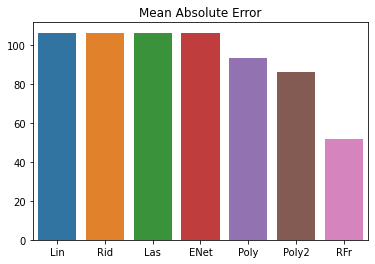

In [64]:
x=['Lin', 'Rid','Las', 'ENet', 'Poly','Poly2','RFr']
y=[lin,rid,las,el,poly,poly2,rfr]

sns.barplot(x,y)
sns.barplot(x,y).set(title='Mean Absolute Error')

## 최종 test data 예측

In [65]:
model = RandomForestRegressor(random_state=0)

In [69]:
model.fit(x_features, y_target)

RandomForestRegressor(random_state=0)

In [70]:
prediction = model.predict(test_data[features])

In [79]:
prediction

array([ 24.57 ,  17.69 ,  14.06 , ..., 136.94 , 127.96 ,  69.153])